<a href="https://colab.research.google.com/github/Bakaos/Bairesdev-machine-learning-training/blob/main/DIO_lab_Calculo_de_Metricas_de_Avaliacao_de_Aprendizado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Descrição do Desafio

##Cálculo de Métricas de Avaliação de Aprendizado

Neste projeto, vamos calcular as principais métricas para avaliação de modelos de classificação de dados, como acurácia, sensibilidade (recall), especificidade, precisão e F-score. Para que seja possível implementar estas funções, você deve utilizar os métodos e suas fórmulas correspondentes (Tabela 1).

Para a leitura dos valores de VP, VN, FP e FN, será necessário escolher uma matriz de confusão para a base dos cálculos. Essa matriz você pode escolher de forma arbitraria, pois nosso objetivo é entender como funciona cada métrica.

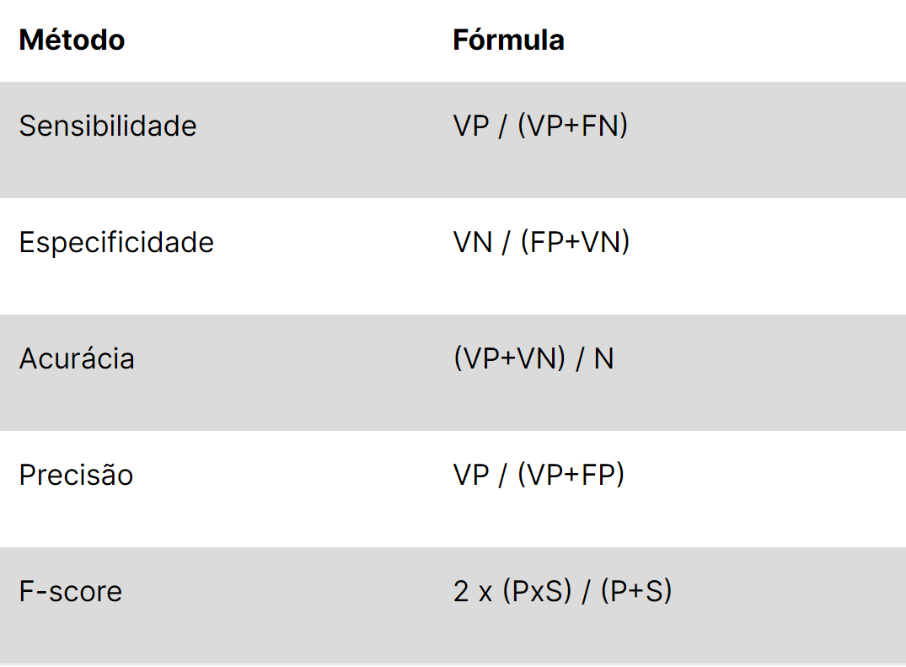

Tabela 1: Visão geral das métricas usadas para avaliar métodos de classificação. VP: verdadeiros positivos; FN: falsos negativos; FP: falsos positivos; VN: verdadeiros negativos; P: precisão; S: sensibilidade; N: total de elementos.

### Sensibilidade

In [ ]:
def sensibilidade(vp, fn):
    """"
    Calcula e imprime a sensibilidade

    Parametros:
      vp: verdadeiro positivo
      fn: falso negativo

    Retorna:
      valor tipo float.
    """"
    sensibilidade = vp / (vp + fn)
    print(f"Sensibilidade calculada: {(sensibilidade*100):.2f}"+"%")
    return sensibilidade

### Especificidade

In [ ]:
def especificidade(vn, fp):
    """"
    Calcula e imprime a especificidade

    Parametros:
      vn: verdadeiro negativo
      fp: falso positivo

    Retorna:
      valor tipo float.
    """"
    especificidade = vn / (vn + fp)
    print(f"Especificidade calculada: {(especificidade*100):.2f}"+"%")
    return especificidade

### Acurácia

In [ ]:
def acuracia(vp, vn, fp, fn):
    """
    Calcula e imprime o valor da acuracia
    Parametros:
      vp: verdadeiro positivo
      vn: verdadeiro negativo
      fp: falso positivo
      fn: falso negativo

    Retorna:
      valor tipo float.
    """
    acuracia = (vp + vn) / (vp + vn + fp + fn)
    print(f"Acurácia calculada: {(acuracia*100):.2f}"+"%")
    return

### Precisão

In [ ]:
def precisao(vp, fp):
    """
    Calcula e imprime a precisão

    Parametros:
      vp: verdadeiro positivo
      fp: falso positivo

    Retorna:
      valor tipo float.
    """
    precisao = vp / (vp + fp)
    print(f"Precisão calculada: {(precisao*100):.2f}"+"%")
    return precisao

### F-score

In [ ]:
def f_score(p, s):
    """
    Calcula e imprime o F-score

    Parametros:
      p: precisão
      s: sensibilidade

    Retorna:
      valor tipo float.
    """
    f_score = 2 * (p * s) / (p + s)
    print(f"F-score calculado: {(f_score*100):.2f}"+"%")
    return f_score

## Curva de ROC

In [ ]:
def computa_roc_points(conf_matriz):
    """
    Computa ROC pontos de (TFP, TVP) da matriz confusão usando a abordagem OvR (OvR = One vs Rest)

    Parametros:
        conf_matriz (lista de listas): n x n matriz confusão.

    Retorna:
        Lista de (TFP, TVP) tuplas, uma para cada classe.
    """
    import numpy as np

    conf_matriz = np.array(conf_matriz)
    num_classes = conf_matriz.shape[0]
    roc_points = []

    for i in range(num_classes):
        TP = conf_matriz[i, i]
        FN = np.sum(conf_matriz[i, :]) - TP
        FP = np.sum(conf_matriz[:, i]) - TP
        TN = np.sum(conf_matriz) - (TP + FP + FN)

        TPR = TP / (TP + FN) if (TP + FN) > 0 else 0.0
        FPR = FP / (FP + TN) if (FP + TN) > 0 else 0.0

        roc_points.append((FPR, TPR))

    return roc_points

In [ ]:
import matplotlib.pyplot as plt

def plot_roc_points(conf_matriz):
    """
    Recebe uma matriz de confusão e utiliza a função computa_roc_points para
     computar e plotar os pontos em um grafico de curva ROC.

    Parametros:
        conf_matriz (lista de listas): n x n matriz confusão.

    Retorna:
        Lista de (TFP, TVP) tuplas, uma para cada classe.
    """
    roc_points = compute_roc_points(conf_matriz)

    plt.figure(figsize=(6, 6))
    for i, (fpr, tpr) in enumerate(roc_points):
        plt.plot(fpr, tpr, 'o', label=f'Classe {i+1}')

    # Plot baseline and format
    plt.plot([0, 1], [0, 1], 'k--', label='Palpite Aleatorio')
    plt.title("Curva ROC (Ponto por Classe)")
    plt.xlabel("Taxa de Falso Positivo")
    plt.ylabel("Taxa de Positivo Verdadeiro")
    plt.legend()
    plt.grid(True)
    plt.show()

    return roc_points

## Teste

Para iniciar os testes é gerada uma matriz 5x5 com valores aleatórios.

In [ ]:
import numpy as np

# Cria uma matriz de confusão 5x5 com valores inteiros aleatórios entre 0 e 100
matriz_confusao = np.random.randint(0, 101, size=(5, 5))

# Imprime a matriz de confusão
print("Matriz de Confusão:")
print(matriz_confusao)

Matriz de Confusão:
[[ 79  18  14  14  11]
 [ 87  82  74  91  73]
 [ 30  18  58  72  83]
 [ 68  57  74  35  88]
 [100  82  51  82  57]]


Chamado das funções definidas acima

In [ ]:
sens = sensibilidade(matriz_confusao[0][0], matriz_confusao[0][1])
espec = especificidade(matriz_confusao[0][3], matriz_confusao[0][2])
acc = acuracia(matriz_confusao[0][0], matriz_confusao[0][3], matriz_confusao[0][2], matriz_confusao[0][1])
prec = precisao(matriz_confusao[0][0], matriz_confusao[0][2])
f_score(prec, sens)

Sensibilidade calculada: 81.44%
Especificidade calculada: 50.00%
Acurácia calculada: 74.40%
Precisão calculada: 84.95%
F-score calculado: 83.16%


np.float64(0.8315789473684212)

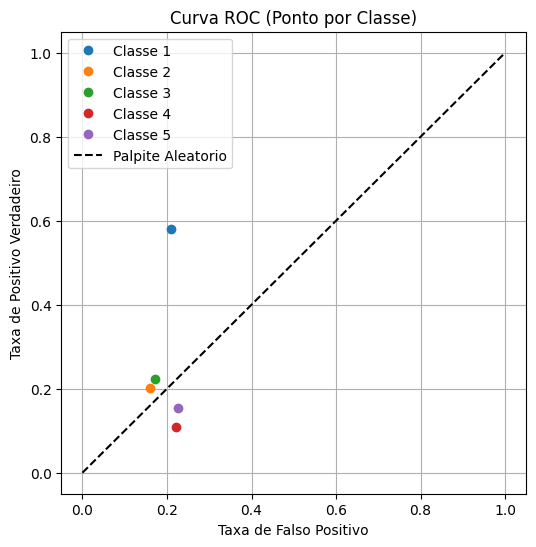

array([[ 79,  18,  14,  14,  11],
       [ 87,  82,  74,  91,  73],
       [ 30,  18,  58,  72,  83],
       [ 68,  57,  74,  35,  88],
       [100,  82,  51,  82,  57]])

In [ ]:
plot_roc_points(matriz_confusao)